# **Importing Libraries**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Data Loading**

In [2]:
df=pd.read_csv('industry.csv')
#print(df)
rows,cols=df.shape
names=df.columns.tolist()
data_types=df.dtypes

print("No. of rows:",rows)
print("No. of columns:",cols)
print("Column names:",names)
print(df.describe())
print("Data types:")
print(data_types)

No. of rows: 321
No. of columns: 10
Column names: ['Year', 'Yearly ranking', 'Name', 'Net worth', 'Age', 'Nationality', 'Source(s) of wealth', 'Annual Change in Net Worth', 'Industry', 'Source(s) of wealth and Industry']
              Year  Yearly ranking   Net worth         Age  \
count   321.000000      321.000000  321.000000  311.000000   
mean   2004.155763        5.264798   36.252025   64.308682   
std      10.637524        2.855090   32.928438   14.658078   
min    1987.000000        1.000000    4.000000   21.000000   
25%    1995.000000        3.000000   12.200000   55.000000   
50%    2005.000000        5.000000   25.500000   65.000000   
75%    2013.000000        8.000000   52.000000   75.500000   
max    2022.000000       10.000000  219.000000   94.000000   

       Annual Change in Net Worth  
count                  321.000000  
mean                     3.167290  
std                     11.472215  
min                    -32.200000  
25%                      0.000000  
50% 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              321 non-null    int64  
 1   Yearly ranking                    321 non-null    int64  
 2   Name                              321 non-null    object 
 3   Net worth                         321 non-null    float64
 4   Age                               311 non-null    float64
 5   Nationality                       321 non-null    object 
 6   Source(s) of wealth               321 non-null    object 
 7   Annual Change in Net Worth        321 non-null    float64
 8   Industry                          321 non-null    object 
 9   Source(s) of wealth and Industry  321 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 25.2+ KB


# **How does the data look?**

Getting basic insights:

In [4]:
df.describe()

,Year,Yearly ranking,Net worth,Age,Annual Change in Net Worth
count,321.000000,321.000000,321.000000,311.000000,321.000000
mean,2004.155763,5.264798,36.252025,64.308682,3.167290
std,10.637524,2.855090,32.928438,14.658078,11.472215
min,1987.000000,1.000000,4.000000,21.000000,-32.200000
25%,1995.000000,3.000000,12.200000,55.000000,0.000000
50%,2005.000000,5.000000,25.500000,65.000000,1.000000
75%,2013.000000,8.000000,52.000000,75.500000,5.100000
max,2022.000000,10.000000,219.000000,94.000000,74.000000


# **Data Preprocessing**

In [5]:
print(df.isnull())

      Year  Yearly ranking   Name  Net worth    Age  Nationality  \
0    False           False  False      False  False        False   
1    False           False  False      False  False        False   
2    False           False  False      False   True        False   
3    False           False  False      False  False        False   
4    False           False  False      False  False        False   
..     ...             ...    ...        ...    ...          ...   
316  False           False  False      False  False        False   
317  False           False  False      False  False        False   
318  False           False  False      False  False        False   
319  False           False  False      False  False        False   
320  False           False  False      False  False        False   

     Source(s) of wealth  Annual Change in Net Worth  Industry  \
0                  False                       False     False   
1                  False                       Fals

In [6]:
missing_values=df.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 Year                                 0
Yearly ranking                       0
Name                                 0
Net worth                            0
Age                                 10
Nationality                          0
Source(s) of wealth                  0
Annual Change in Net Worth           0
Industry                             0
Source(s) of wealth and Industry     0
dtype: int64


# **Data Cleaning**

In [7]:
df.dropna()

,Year,Yearly ranking,Name,Net worth,Age,Nationality,Source(s) of wealth,Annual Change in Net Worth,Industry,Source(s) of wealth and Industry
0,1987,1,Yoshiaki Tsutsumi,20.0,53.0,Japan,Seibu conglomerate,0.0,Conglomerate,Seibu conglomerate (Conglomerate)
1,1987,2,Taikichiro Mori,15.0,83.0,Japan,Mori Building Company,0.0,RealEstate,Mori Building Company (RealEstate)
3,1987,4,Haruhiko Yoshimoto,7.0,64.0,Japan,Yoshimoto Tochi Tatemono,0.0,RealEstate,Yoshimoto Tochi Tatemono (RealEstate)
4,1987,5,Salim Ahmed Bin Mahfouz,6.2,38.0,Saudi Arabia,Saudi Economic & Development Co Ltd.,0.0,RealEstate,Saudi Economic & Development Co Ltd. (RealEstate)
5,1987,6,Hans and Gad Rausing,6.0,61.0,Sweden,Tetra Pak,0.0,Packaging,Tetra Pak (Packaging)
...,...,...,...,...,...,...,...,...,...,...
316,2022,8,Larry Ellison,106.0,77.0,United States,Oracle Corporation,13.0,Technology,Oracle Corporation (Technology)
317,2022,10,Mukesh Ambani,90.7,64.0,India,Reliance Industries,6.2,Conglomerate,Reliance Industries (Conglomerate)
318,2022,6,Larry Page,111.0,49.0,United States,Alphabet Inc.,19.5,Technology,Alphabet Inc. (Technology)
319,2022,2,Jeff Bezos,177.0,58.0,United States,Amazon,0.0,Retail,Amazon (Retail)


In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Length: 321, dtype: bool

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
mean_values = df[numeric_columns].mean()
sum_values = df[numeric_columns].sum()
range_values = df[numeric_columns].max() - df[numeric_columns].min()
min_values = df[numeric_columns].min()
max_values = df[numeric_columns].max()
median_values = df[numeric_columns].median()
std_values = df[numeric_columns].std()

print("Mean:\n", mean_values)
print("\nSum:\n", sum_values)
print("\nRange:\n", range_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)
print("\nMedian:\n", median_values)
print("\nStandard deviation:\n", std_values)

Mean:
 Year                          2004.155763
Yearly ranking                   5.264798
Net worth                       36.252025
Age                             64.308682
Annual Change in Net Worth       3.167290
dtype: float64

Sum:
 Year                          643334.0
Yearly ranking                  1690.0
Net worth                      11636.9
Age                            20000.0
Annual Change in Net Worth      1016.7
dtype: float64

Range:
 Year                           35.0
Yearly ranking                  9.0
Net worth                     215.0
Age                            73.0
Annual Change in Net Worth    106.2
dtype: float64

Minimum values:
 Year                          1987.0
Yearly ranking                   1.0
Net worth                        4.0
Age                             21.0
Annual Change in Net Worth     -32.2
dtype: float64

Maximum values:
 Year                          2022.0
Yearly ranking                  10.0
Net worth                      219.0


# **Data Visualization**

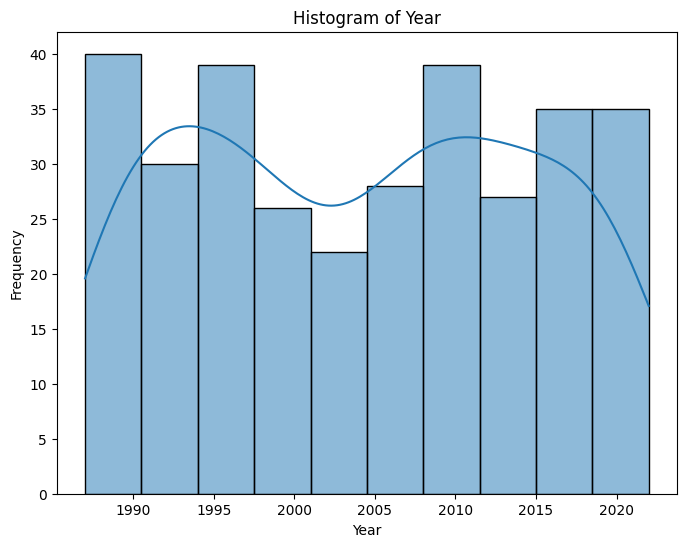

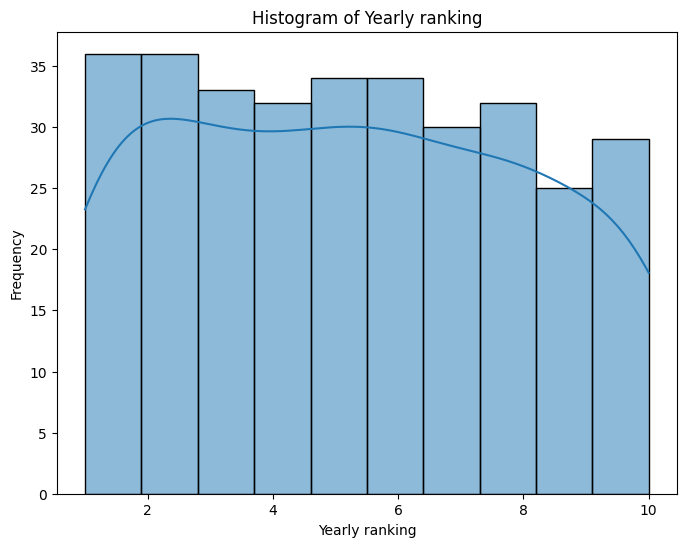

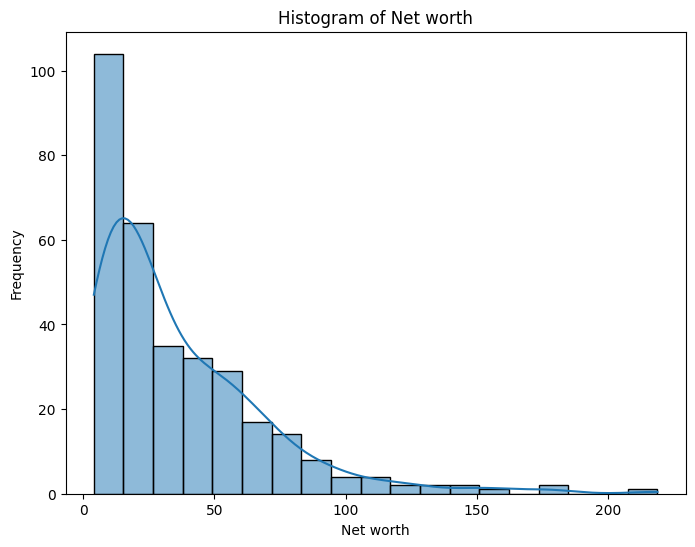

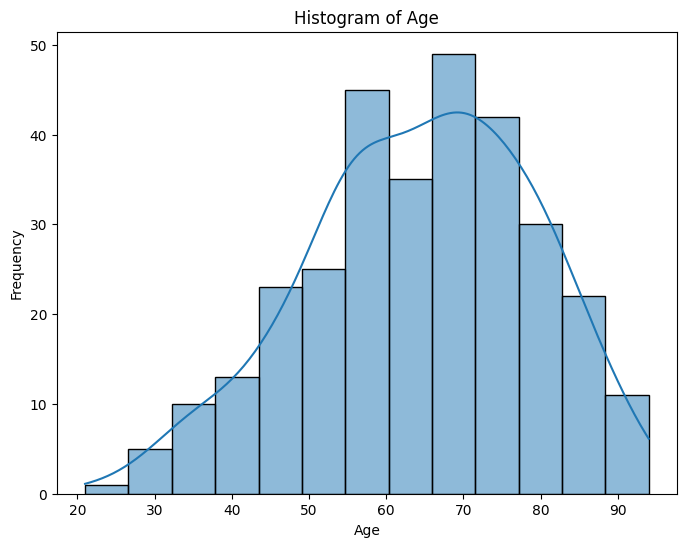

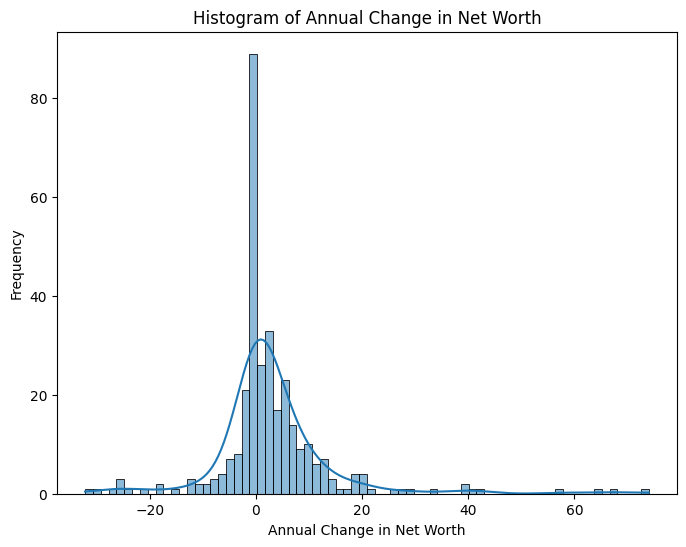

In [11]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

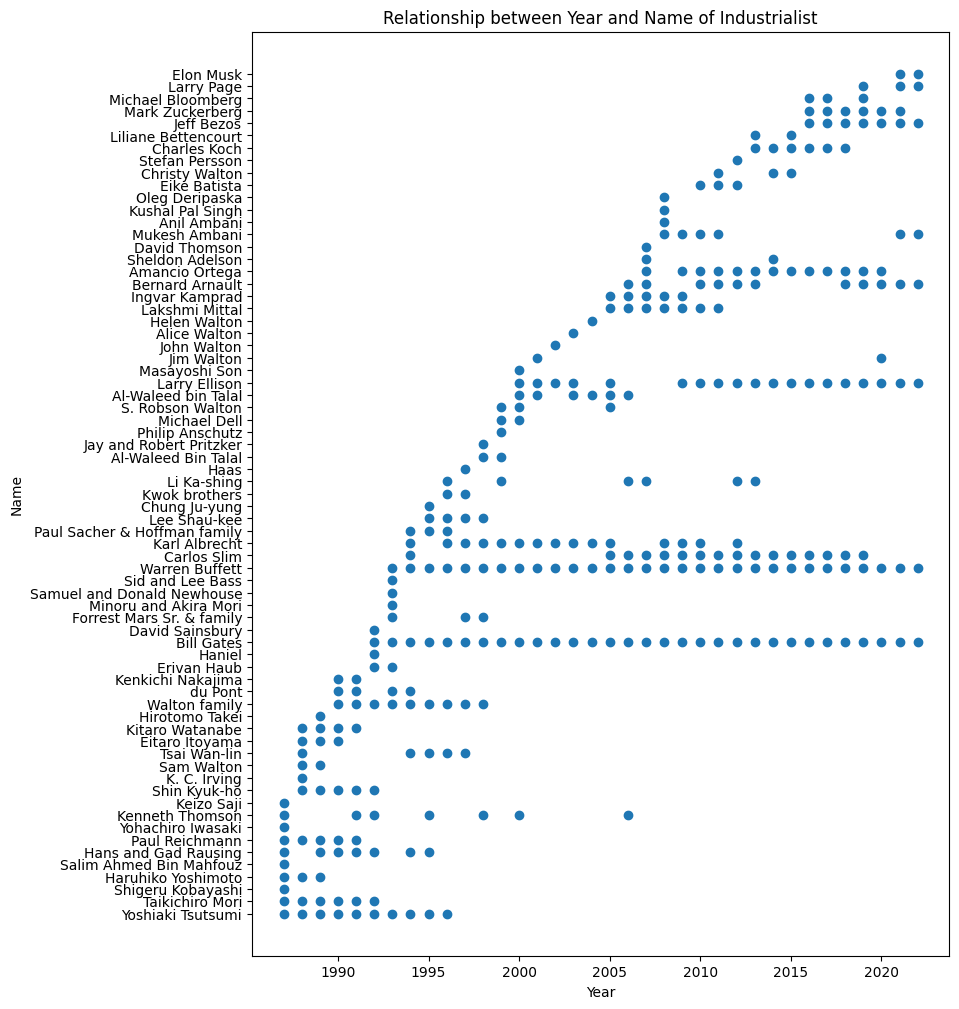

In [85]:
plt.figure(figsize=(9, 12))
plt.scatter(df['Year'], df['Name'])
plt.title('Relationship between Year and Name of Industrialist')
plt.xlabel('Year')
plt.ylabel('Name')
plt.show()

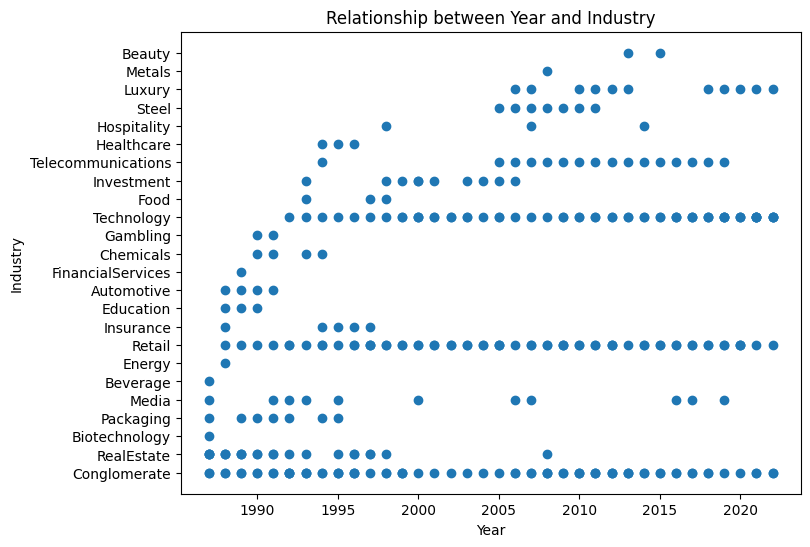

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['Industry'])
plt.title('Relationship between Year and Industry')
plt.xlabel('Year')
plt.ylabel('Industry')
plt.show()

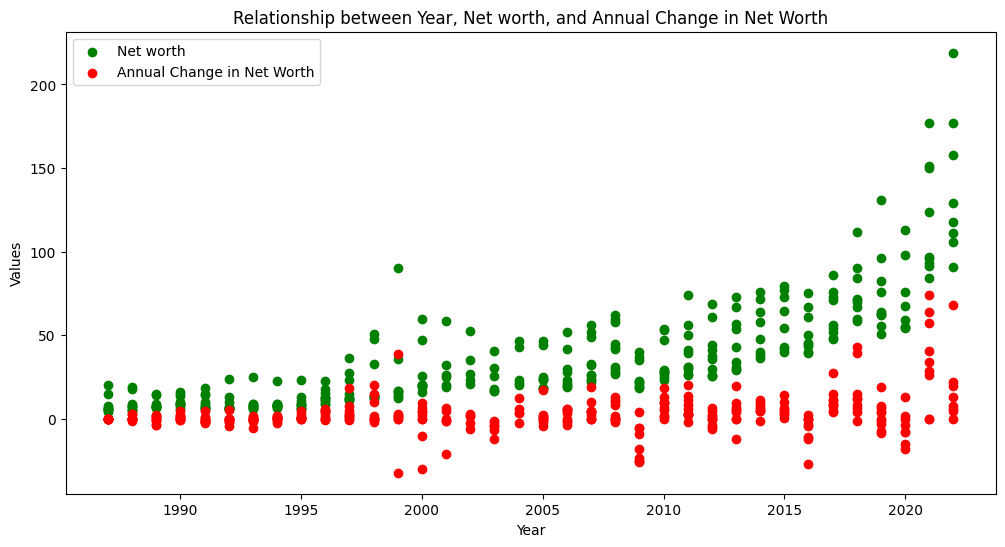

In [14]:
plt.figure(figsize=(12, 6))

# Scatter plot for 'Net worth'
plt.scatter(df['Year'], df['Net worth'], label='Net worth', color='green', marker='o')

# Scatter plot for 'Annual Change in Net Worth'
plt.scatter(df['Year'], df['Annual Change in Net Worth'], label='Annual Change in Net Worth', color='red', marker='o')

plt.title('Relationship between Year, Net worth, and Annual Change in Net Worth')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()

# Show the combined plot
plt.show()

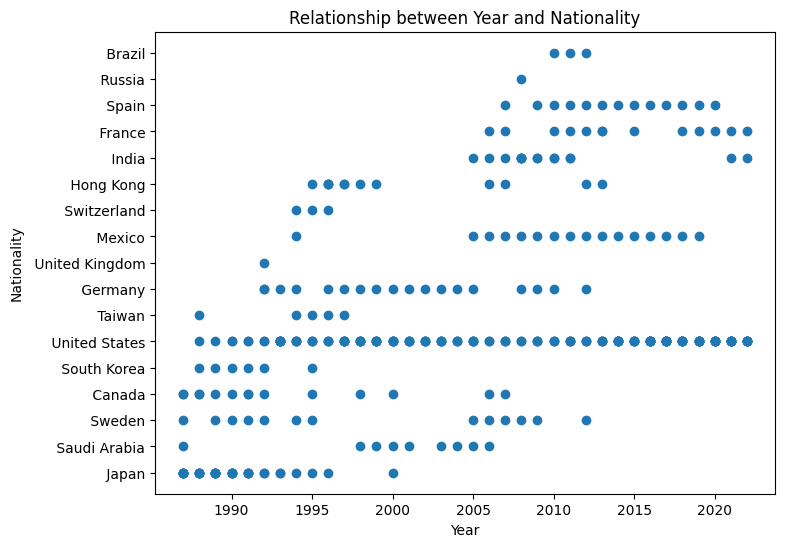

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['Nationality'])
plt.title('Relationship between Year and Nationality')
plt.xlabel('Year')
plt.ylabel('Nationality')
plt.show()

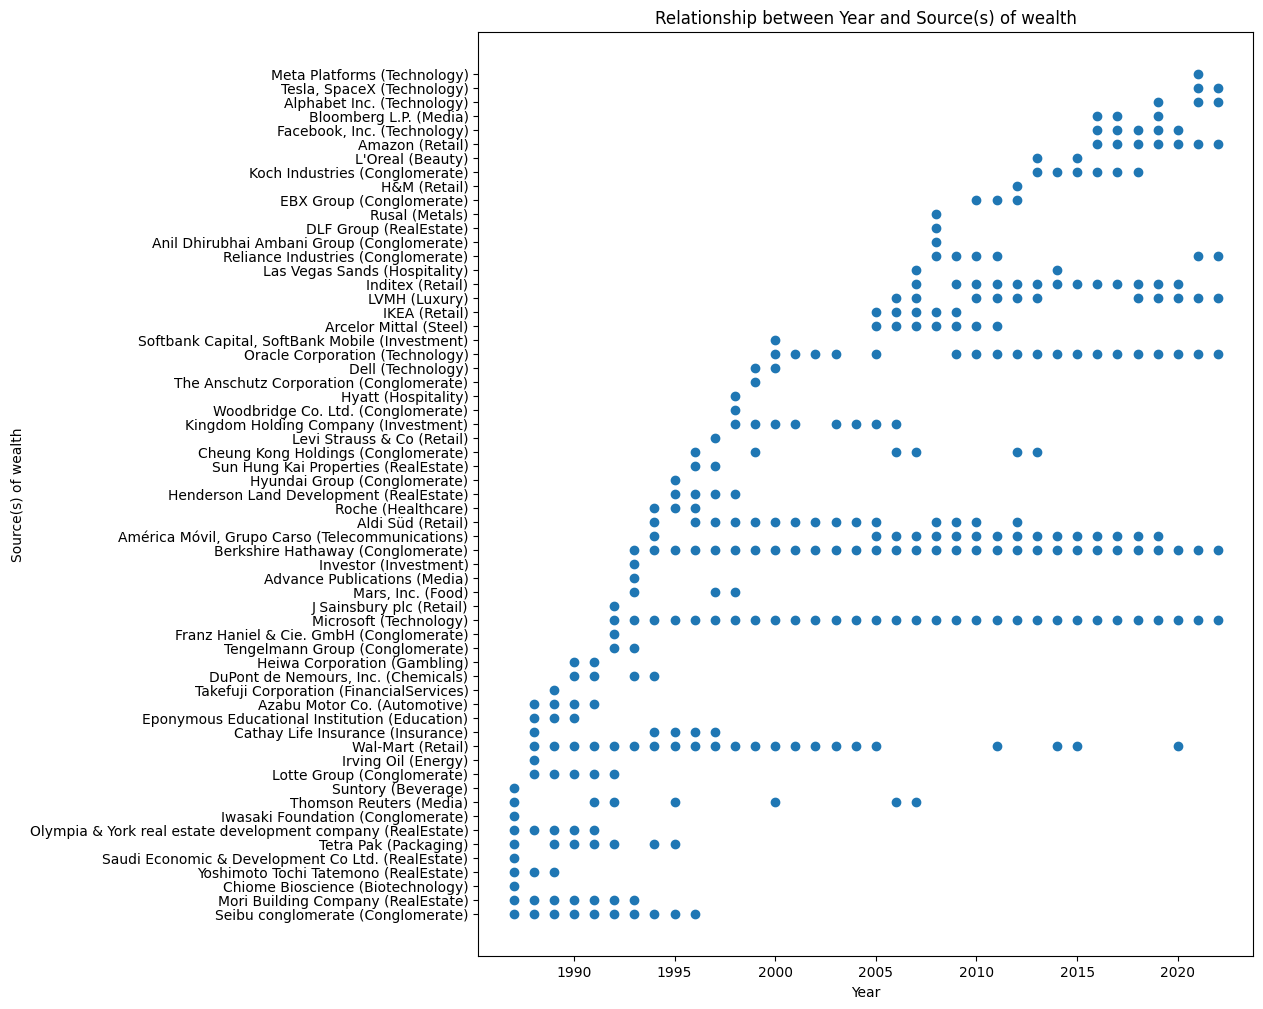

In [87]:
plt.figure(figsize=(10, 12))
plt.scatter(df['Year'], df['Source(s) of wealth and Industry'])
plt.title('Relationship between Year and Source(s) of wealth')
plt.xlabel('Year')
plt.ylabel('Source(s) of wealth')
plt.show()

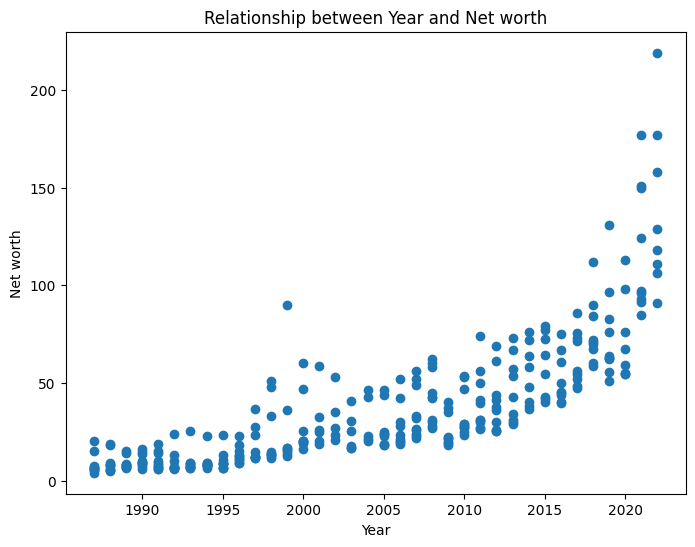

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['Net worth'])
plt.title('Relationship between Year and Net worth')
plt.xlabel('Year')
plt.ylabel('Net worth')
plt.show()

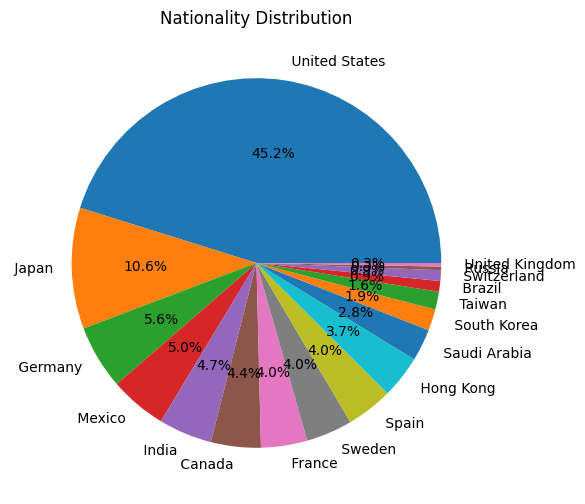

In [18]:
nationality_counts = df['Nationality'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%')
plt.title('Nationality Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


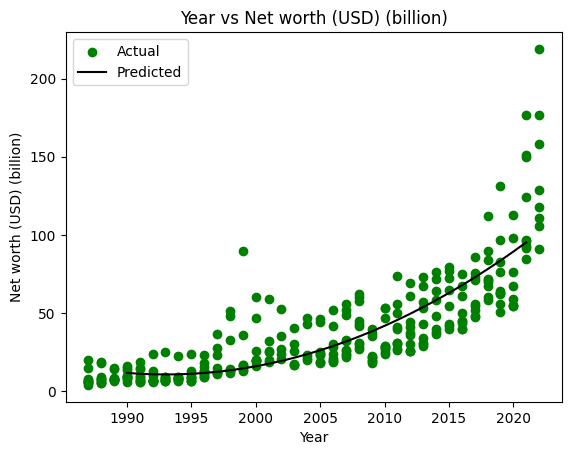

In [19]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(df[['Year']])
model = LinearRegression()
model.fit(X_poly, df['Net worth'])

#prediction data
X_pred = np.arange(1990, 2022).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

plt.scatter(df['Year'], df['Net worth'], color='green', label='Actual')
plt.plot(X_pred, y_pred, color='black', label='Predicted')

plt.title('Year vs Net worth (USD) (billion)')
plt.xlabel('Year')
plt.ylabel('Net worth (USD) (billion)')
plt.legend()
plt.show()

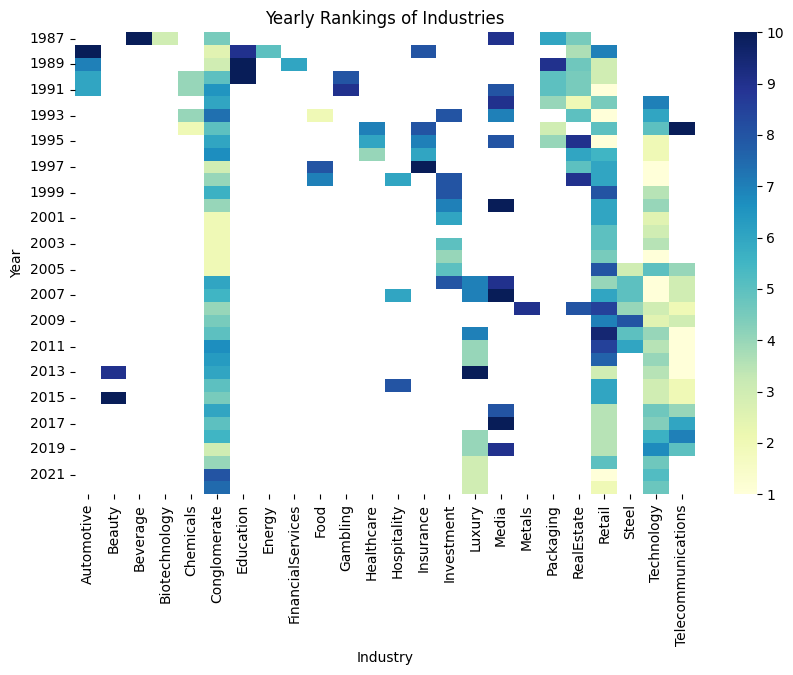

In [20]:
plt.figure(figsize=(10, 6))
pivot_rankings = df.pivot_table(index='Year', columns='Industry', values='Yearly ranking')
sns.heatmap(pivot_rankings, cmap='YlGnBu')
plt.xlabel('Industry')
plt.ylabel('Year')
plt.title('Yearly Rankings of Industries')
plt.show()

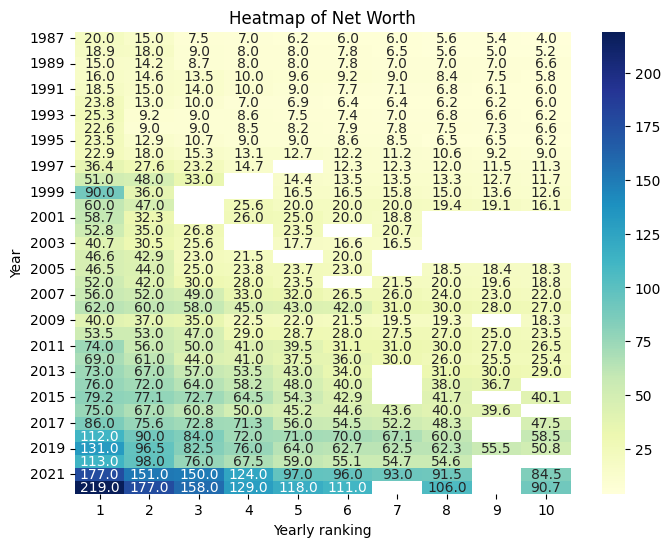

In [21]:
heatmap_data = df.pivot(index='Year', columns='Yearly ranking', values='Net worth')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True)
plt.xlabel('Yearly ranking')
plt.ylabel('Year')
plt.title('Heatmap of Net Worth')
plt.show()

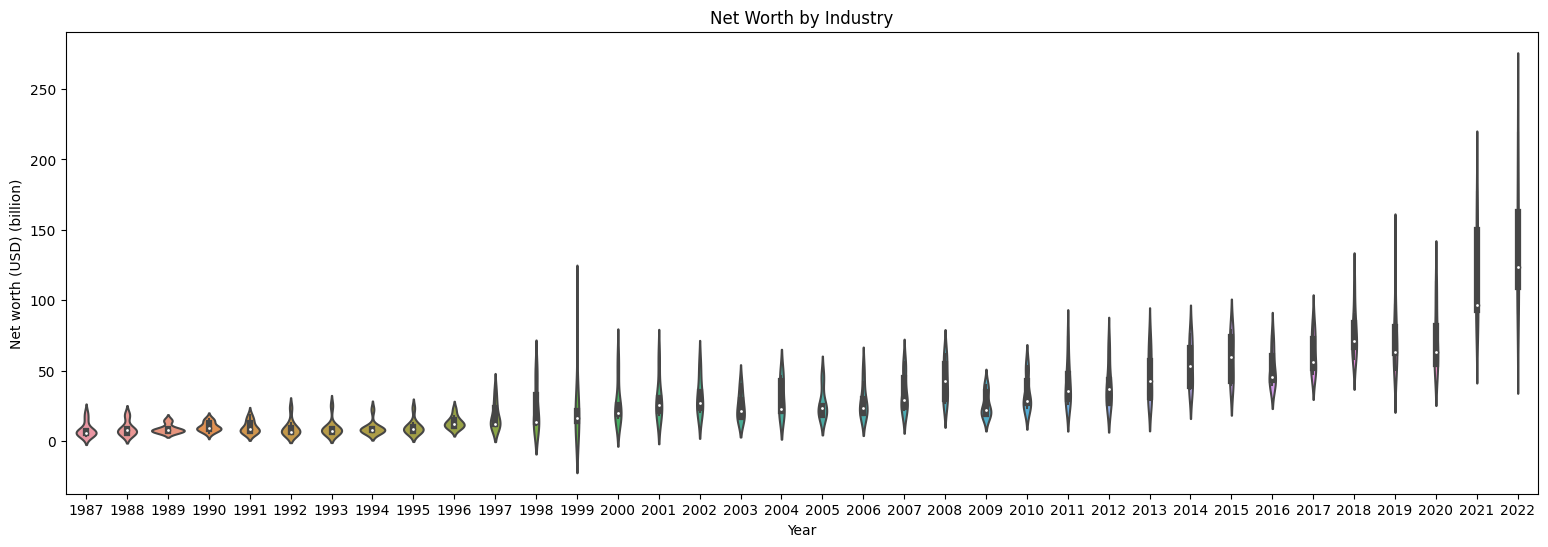

In [23]:
plt.figure(figsize=(19, 6))
sns.violinplot(x='Year', y='Net worth', data=df)
plt.xlabel('Year')
plt.ylabel('Net worth (USD) (billion)')
plt.title('Net Worth by Industry')
plt.show()

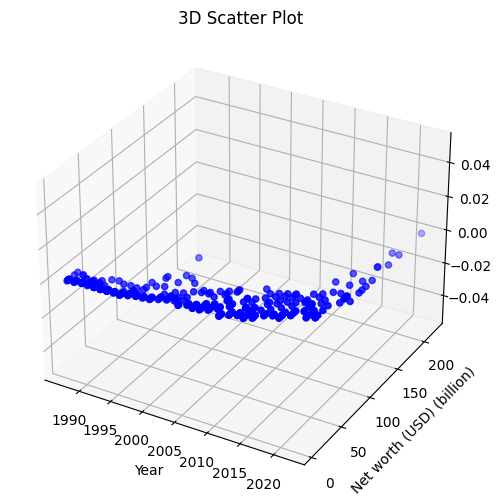

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Year'], df['Net worth'], c='blue', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Net worth (USD) (billion)')
ax.set_title('3D Scatter Plot')
plt.show()


### **Nationality Count**

In [25]:
df['Wealth_Source_Category'] = pd.Categorical(df['Source(s) of wealth'])
nationality_count = df.groupby('Industry')['Nationality'].value_counts()
nationality_count

Industry            Nationality    
Automotive           Japan              4
Beauty               France             2
Beverage             Japan              1
Biotechnology        Japan              1
Chemicals            United States      4
Conglomerate         United States     37
                     Japan             11
                     India              7
                     Hong Kong          6
                     South Korea        6
                     Brazil             3
                     Germany            3
                     Canada             1
Education            Japan              3
Energy               Canada             1
FinancialServices    Japan              1
Food                 United States      3
Gambling             Japan              2
Healthcare           Switzerland        3
Hospitality          United States      3
Insurance            Taiwan             5
Investment           Saudi Arabia       8
                     Japan              

**Total Net worth**

In [26]:
total_net_worth = df.groupby('Industry')['Net worth'].sum()
total_net_worth

Industry
Automotive              29.1
Beauty                  70.1
Beverage                 4.0
Biotechnology            7.5
Chemicals               37.6
Conglomerate          2482.1
Education               17.4
Energy                   8.0
FinancialServices        7.8
Food                    34.7
Gambling                14.5
Healthcare              29.5
Hospitality             78.0
Insurance               45.1
Investment             177.4
Luxury                 718.0
Media                  232.6
Metals                  28.0
Packaging               56.6
RealEstate             264.5
Retail                2476.8
Steel                  204.6
Technology            3754.4
Telecommunications     858.6
Name: Net worth, dtype: float64

**Nationality with highest networth**

In [27]:
nationality_networth = df.groupby('Nationality')['Net worth'].sum()

# Find nationality with the highest net worth
highest_networth_nationality = nationality_networth.idxmax()
highest_networth_value = nationality_networth.max()

print("Nationality with the highest net worth:", highest_networth_nationality)
print("Net worth:", highest_networth_value)

Nationality with the highest net worth:  United States
Net worth: 7159.4


Binning the Age Group

In [28]:
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '50+']
# Perform age group binning
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df)

     Year  Yearly ranking                     Name  Net worth    Age  \
0    1987               1        Yoshiaki Tsutsumi       20.0    50+   
1    1987               2          Taikichiro Mori       15.0    50+   
2    1987               3        Shigeru Kobayashi        7.5    NaN   
3    1987               4       Haruhiko Yoshimoto        7.0    50+   
4    1987               5  Salim Ahmed Bin Mahfouz        6.2  30-40   
..    ...             ...                      ...        ...    ...   
316  2022               8            Larry Ellison      106.0    50+   
317  2022              10            Mukesh Ambani       90.7    50+   
318  2022               6               Larry Page      111.0  40-50   
319  2022               2               Jeff Bezos      177.0    50+   
320  2022               3          Bernard Arnault      158.0    50+   

        Nationality                   Source(s) of wealth  \
0             Japan                    Seibu conglomerate   
1            

# **Leading and Lagging Industry**

In [29]:
industry_networth = df.groupby('Industry')['Net worth'].sum()
# Identify leading industry
leading_industry = industry_networth.idxmax()
leading_networth = industry_networth.max()
# Identify lagging industry
lagging_industry = industry_networth.idxmin()
lagging_networth = industry_networth.min()
print("Leading Industry:", leading_industry)
print("Net Worth:", leading_networth)
print("Lagging Industry:", lagging_industry)
print("Net Worth:", lagging_networth)

Leading Industry: Technology
Net Worth: 3754.4
Lagging Industry: Beverage
Net Worth: 4.0


**Dominant Industry**

In [30]:
industry_totals = df.groupby("Industry")["Net worth"].sum()
dominant_industries = industry_totals.sort_values(ascending=False)
print(dominant_industries)

Industry
Technology            3754.4
Conglomerate          2482.1
Retail                2476.8
Telecommunications     858.6
Luxury                 718.0
RealEstate             264.5
Media                  232.6
Steel                  204.6
Investment             177.4
Hospitality             78.0
Beauty                  70.1
Packaging               56.6
Insurance               45.1
Chemicals               37.6
Food                    34.7
Healthcare              29.5
Automotive              29.1
Metals                  28.0
Education               17.4
Gambling                14.5
Energy                   8.0
FinancialServices        7.8
Biotechnology            7.5
Beverage                 4.0
Name: Net worth, dtype: float64


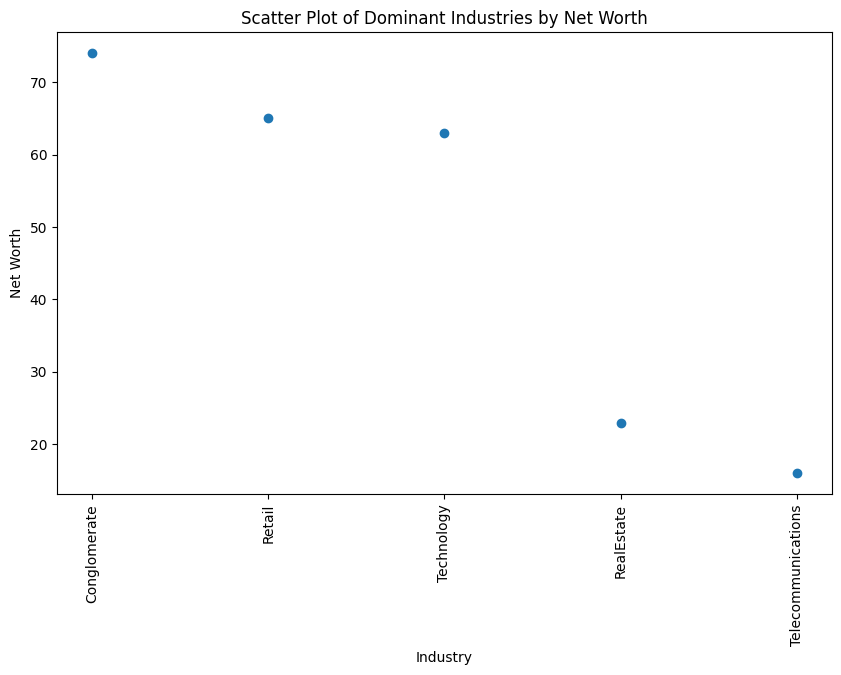

In [89]:
# Create a scatter plot of dominant industries
plt.figure(figsize=(10, 6))

x = dominant_industries.index  # Industries
y = dominant_industries.values  # Net worth
plt.scatter(x, y,)
plt.xlabel('Industry')
plt.ylabel('Net Worth')
plt.title('Scatter Plot of Dominant Industries by Net Worth')
plt.xticks(rotation=90)
plt.show()  # Display the scatter plot

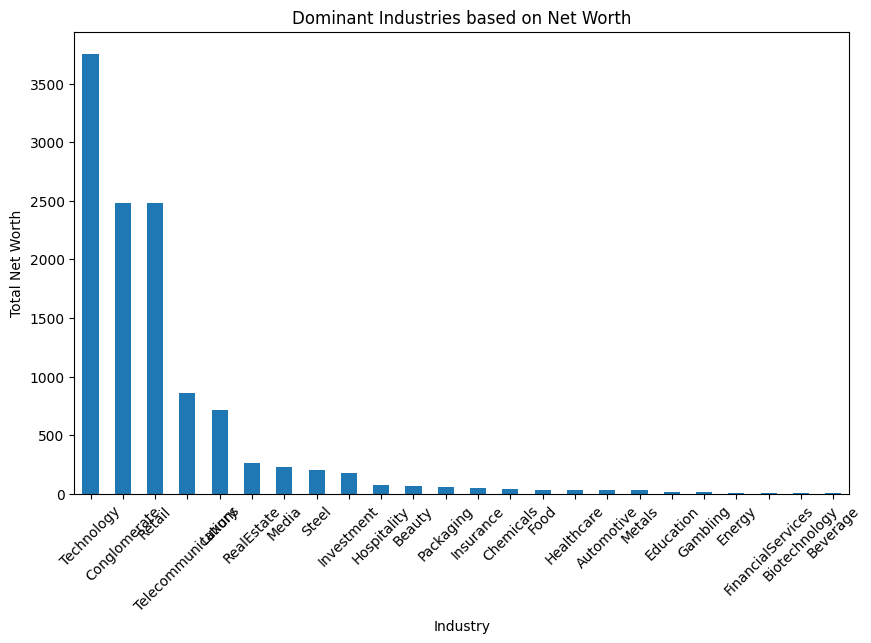

In [32]:
# Create a bar plot of the dominant industries
plt.figure(figsize=(10, 6))
dominant_industries.plot(kind='bar')
plt.title('Dominant Industries based on Net Worth')
plt.xlabel('Industry')
plt.ylabel('Total Net Worth')
plt.xticks(rotation=45)
plt.show()

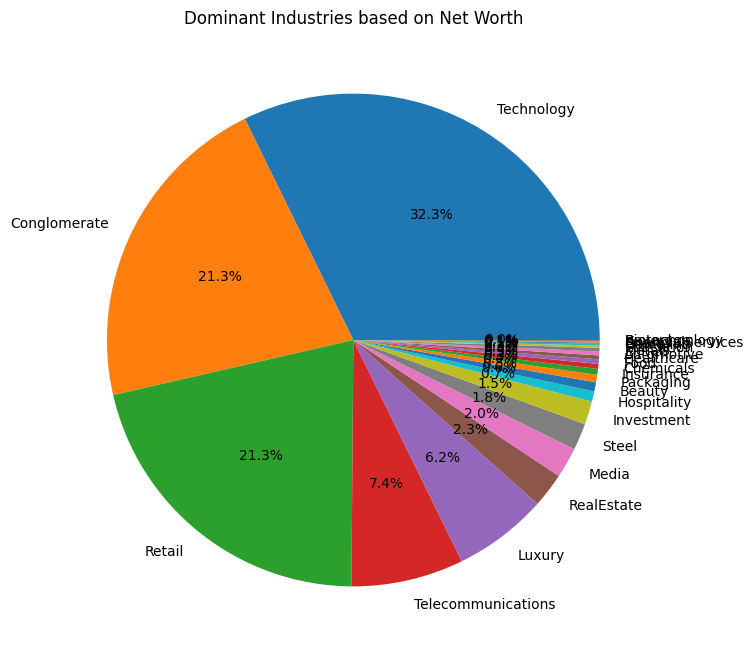

In [33]:
plt.figure(figsize=(8, 8))
dominant_industries.plot(kind='pie', autopct='%1.1f%%')
plt.title('Dominant Industries based on Net Worth')
plt.ylabel('')
plt.show()

In [34]:
# Sort the DataFrame by year and net worth
df.sort_values(by=['Year', 'Net worth'], inplace=True)

# Calculate the changes in net worth by grouping the data by individuals
df['Net worth change'] = df.groupby('Name')['Net worth'].diff()

# Calculate the percentage change in net worth
df['Net worth change (%)'] = df.groupby('Name')['Net worth'].pct_change() * 100

# View the changes in net worth over time for a specific individual
individual_name = 'Yoshiaki Tsutsumi'
individual_df = df[df['Name'] == individual_name]
individual_df = individual_df[['Year', 'Net worth change', 'Net worth change (%)']]

print(individual_df)

    Year  Net worth change  Net worth change (%)
0   1987               NaN                   NaN
10  1988              -1.1             -5.500000
20  1989              -3.9            -20.634921
30  1990               1.0              6.666667
42  1991              -2.0            -12.500000
52  1992              -4.0            -28.571429
62  1993              -1.0            -10.000000
75  1994              -0.5             -5.555556
84  1995               0.5              5.882353
99  1996               0.2              2.222222


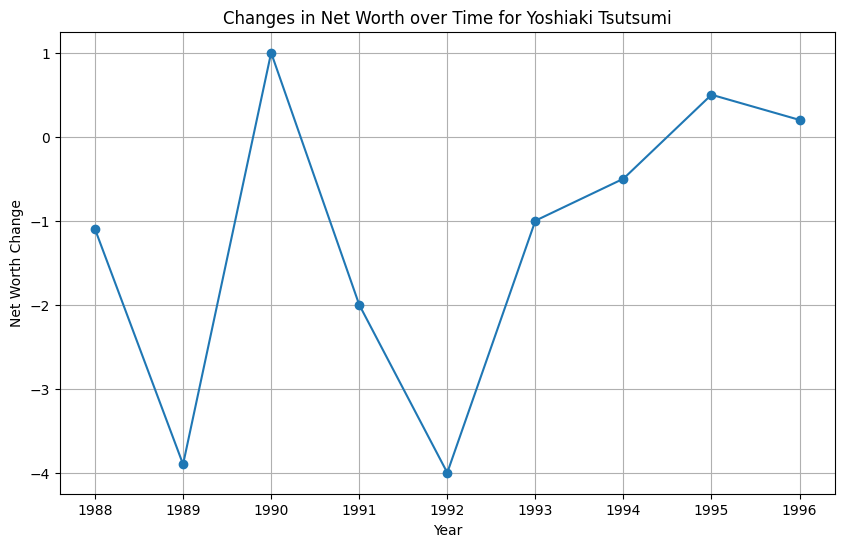

In [35]:
# Plot the changes in net worth over time
plt.figure(figsize=(10, 6))
plt.plot(individual_df['Year'], individual_df['Net worth change'], marker='o')
plt.xlabel('Year')
plt.ylabel('Net Worth Change')
plt.title(f'Changes in Net Worth over Time for {individual_name}')
plt.grid(True)
plt.show()


In [36]:
industry_concentration = df.groupby("Industry")["Net worth"].agg(["sum", "mean", "median"])

# Sort the results by the sum of net worth in descending order
industry_concentration = industry_concentration.sort_values(by="sum", ascending=False)

# Print the results
print(industry_concentration)

                       sum       mean  median
Industry                                     
Technology          3754.4  59.593651   54.30
Conglomerate        2482.1  33.541892   29.50
Retail              2476.8  38.104615   25.00
Telecommunications   858.6  53.662500   57.25
Luxury               718.0  65.272727   41.00
RealEstate           264.5  11.500000   11.20
Media                232.6  21.145455   16.10
Steel                204.6  29.228571   28.70
Investment           177.4  17.740000   19.70
Hospitality           78.0  26.000000   26.50
Beauty                70.1  35.050000   35.05
Packaging             56.6   8.085714    9.00
Insurance             45.1   9.020000    8.50
Chemicals             37.6   9.400000    9.50
Food                  34.7  11.566667   12.00
Healthcare            29.5   9.833333    8.60
Automotive            29.1   7.275000    7.35
Metals                28.0  28.000000   28.00
Education             17.4   5.800000    5.80
Gambling              14.5   7.250

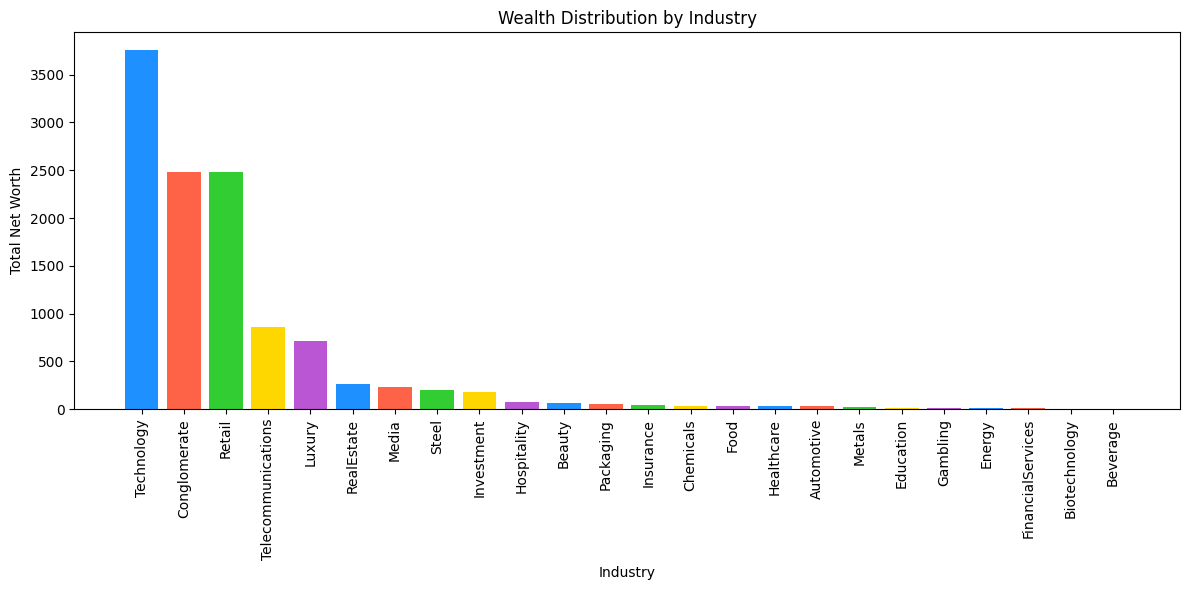

In [37]:
# Sort the results by the sum of net worth in descending order
industry_concentration = industry_concentration.sort_values(by="sum", ascending=False)

# Define a custom color for the bars
colors = ['dodgerblue', 'tomato', 'limegreen', 'gold', 'mediumorchid']

# Plot the total net worth by industry using the custom color
plt.figure(figsize=(12, 6))
plt.bar(industry_concentration.index, industry_concentration["sum"], color=colors)
plt.xlabel("Industry")
plt.ylabel("Total Net Worth")
plt.title("Wealth Distribution by Industry")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

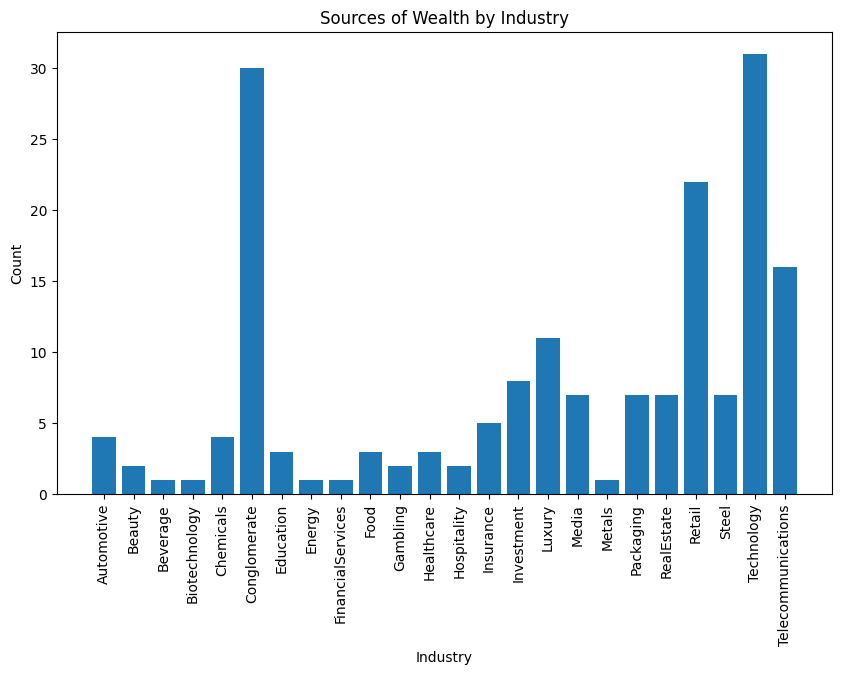

In [38]:
df["Industry"] = df["Industry"].astype(str)
df["Source(s) of wealth and Industry"] = df["Source(s) of wealth and Industry"].astype(str)
industry_wealth_groups = df.groupby(["Industry", "Source(s) of wealth and Industry"]).size().reset_index(name="Count")
#bar plot to show the count of each source of wealth within each industry
plt.figure(figsize=(10, 6))
plt.bar(industry_wealth_groups["Industry"], industry_wealth_groups["Count"])
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Sources of Wealth by Industry")
plt.show()

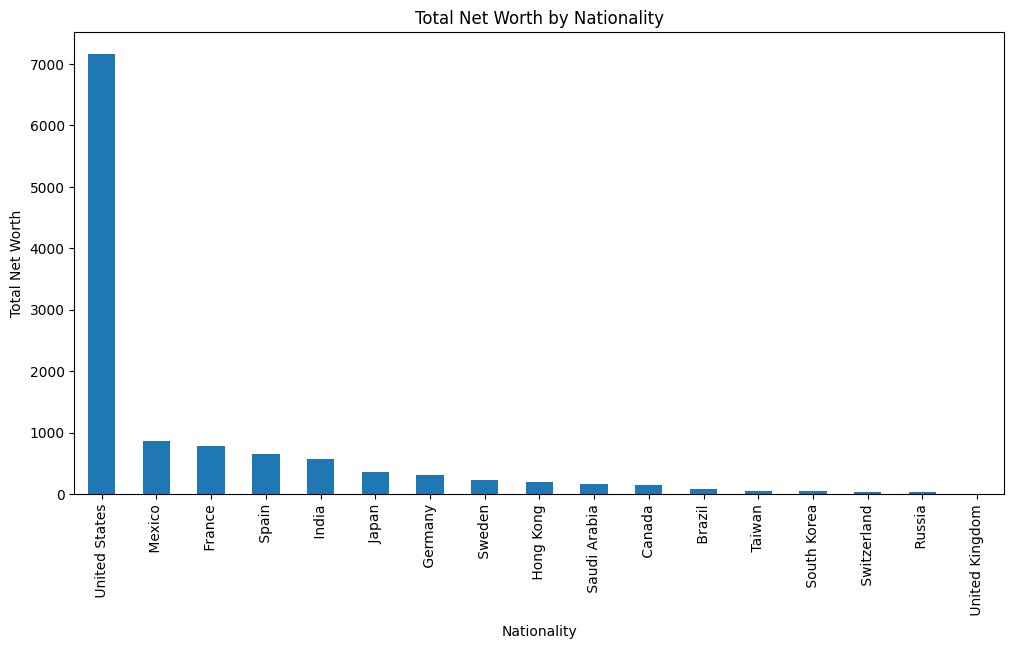

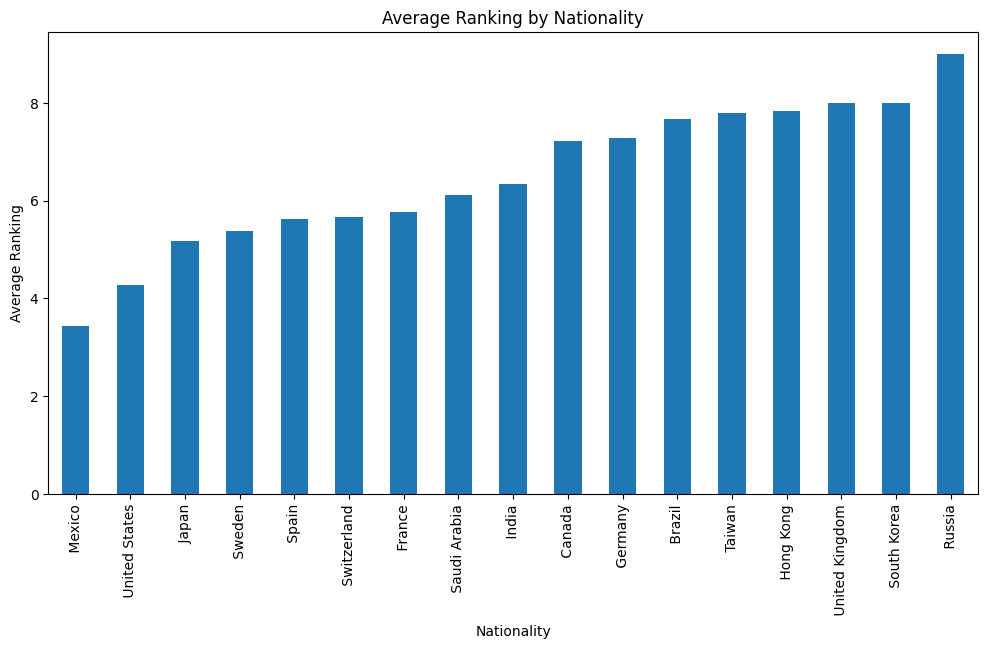

In [39]:
nationality_net_worth = df.groupby('Nationality')['Net worth'].sum().sort_values(ascending=False)

#bar plot to compare the total net worth across nationalities
plt.figure(figsize=(12, 6))
nationality_net_worth.plot(kind='bar')
plt.xlabel('Nationality')
plt.ylabel('Total Net Worth')
plt.title('Total Net Worth by Nationality')
plt.show()
#Grouping the data by nationality and calculate the average ranking for each nationality
nationality_ranking = df.groupby('Nationality')['Yearly ranking'].mean().sort_values()
#bar plot to compare the average ranking across nationalities
plt.figure(figsize=(12, 6))
nationality_ranking.plot(kind='bar')
plt.xlabel('Nationality')
plt.ylabel('Average Ranking')
plt.title('Average Ranking by Nationality')
plt.show()

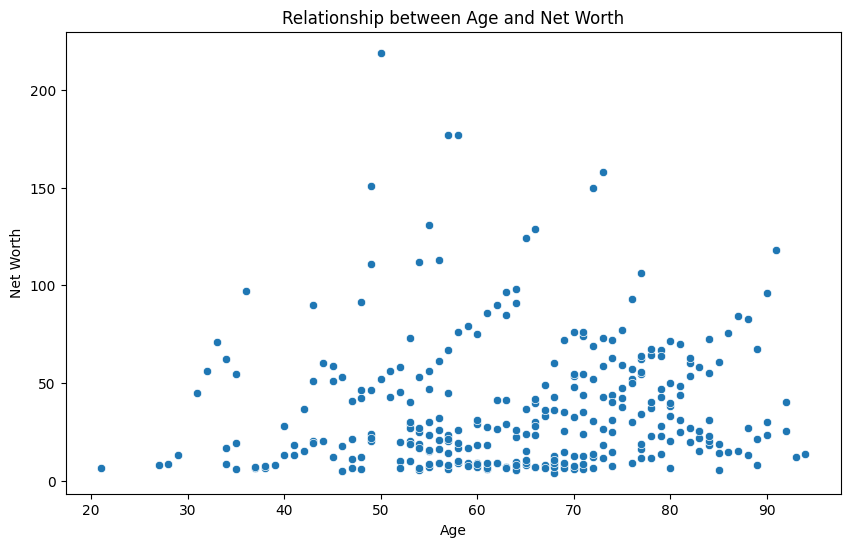

In [40]:
df=pd.read_csv('industry.csv')
df.dropna()
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Net worth'] = pd.to_numeric(df['Net worth'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Net worth', data=df)
plt.title('Relationship between Age and Net Worth')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.show()

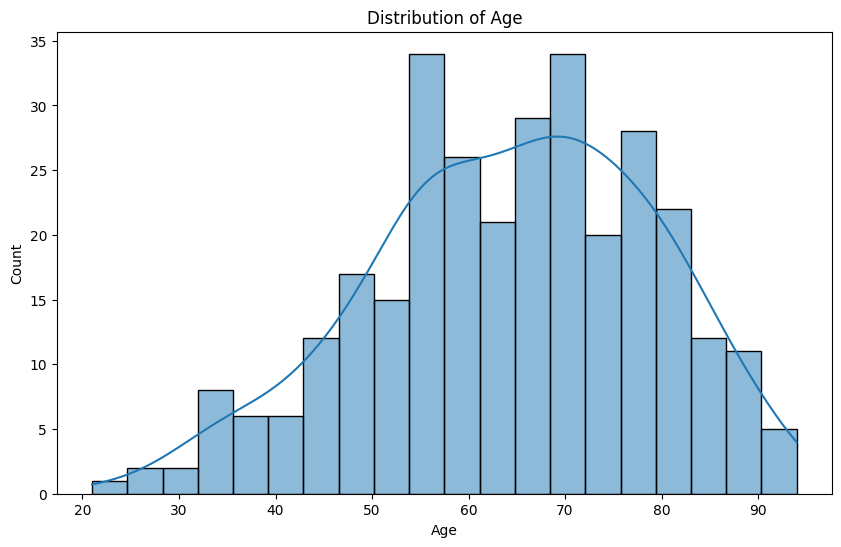

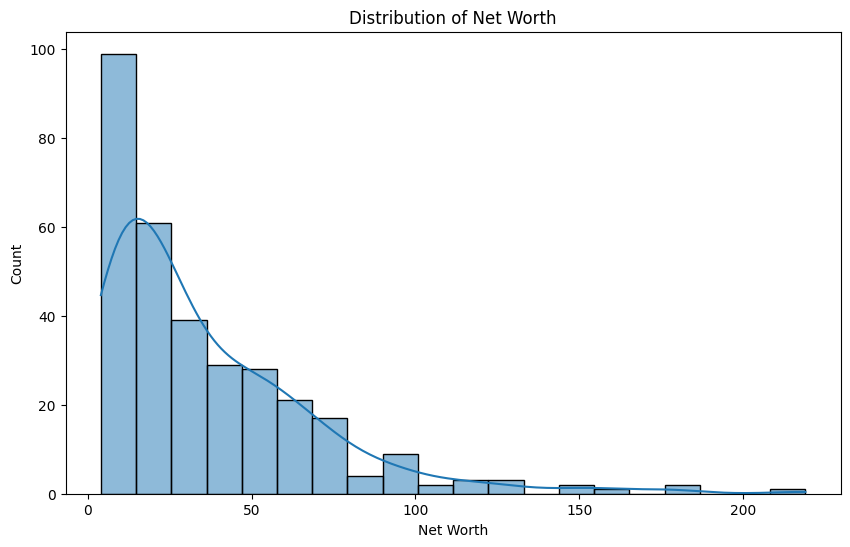

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Net worth'], bins=20, kde=True)
plt.title('Distribution of Net Worth')
plt.xlabel('Net Worth')
plt.show()

In [42]:
correlation = df['Age'].corr(df['Net worth'])
print("Correlation coefficient between Age and Net Worth:", correlation)

Correlation coefficient between Age and Net Worth: 0.07086201954446011


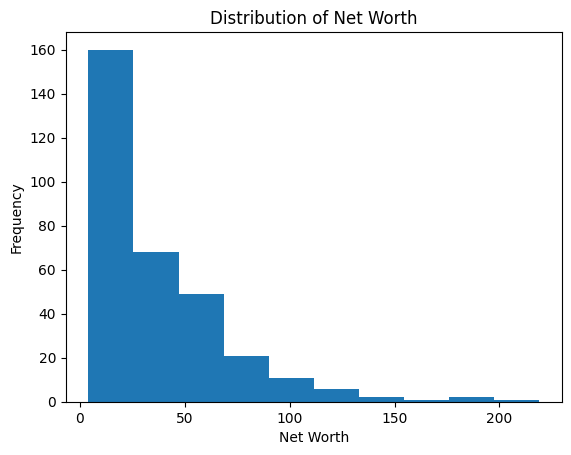

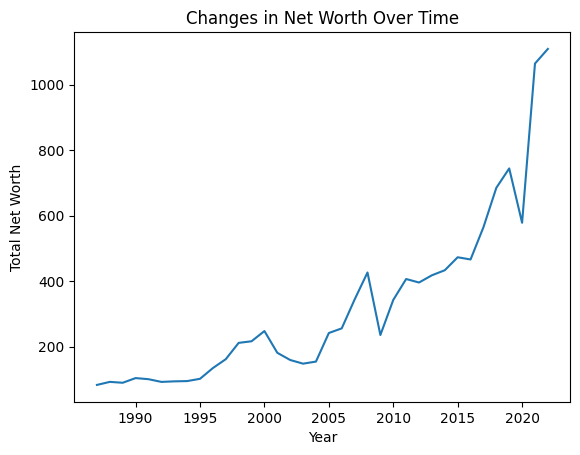

Highest number of Industries:
Conglomerate          74
Retail                65
Technology            63
RealEstate            23
Telecommunications    16
Name: Industry, dtype: int64


In [43]:
#distribution of net worth
plt.hist(df['Net worth'])
plt.xlabel('Net Worth')
plt.ylabel('Frequency')
plt.title('Distribution of Net Worth')
plt.show()

#Tracking changes in net worth over time
df_grouped = df.groupby('Year')['Net worth'].sum()
plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel('Year')
plt.ylabel('Total Net Worth')
plt.title('Changes in Net Worth Over Time')
plt.show()

#dominant industries
dominant_industries = df['Industry'].value_counts().head(5)
print("Highest number of Industries:")
print(dominant_industries)

In [44]:
correlation = df['Net worth'].corr(df['Age'])
print("Correlation between Net Worth and Age:", correlation)

Correlation between Net Worth and Age: 0.07086201954446011


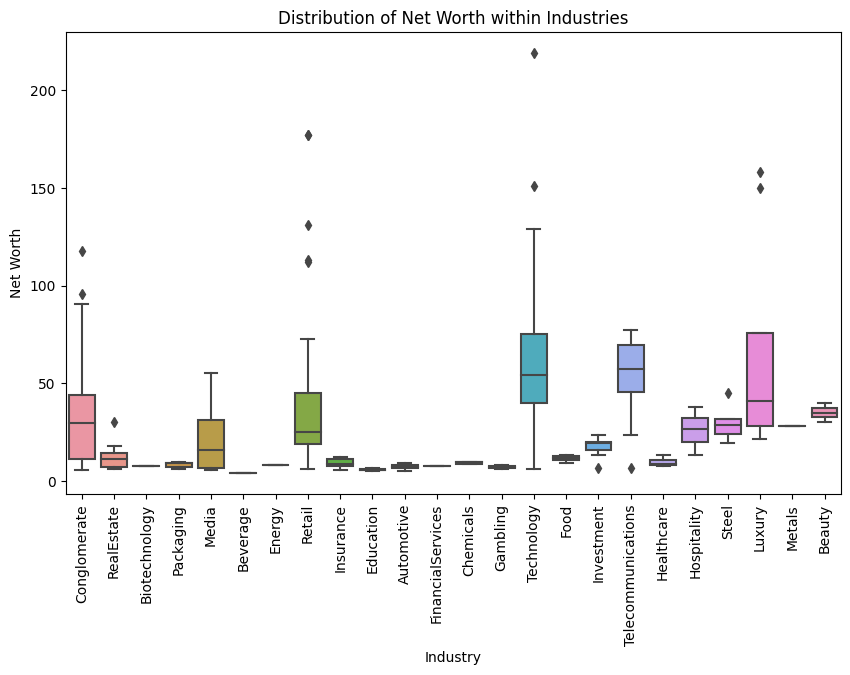

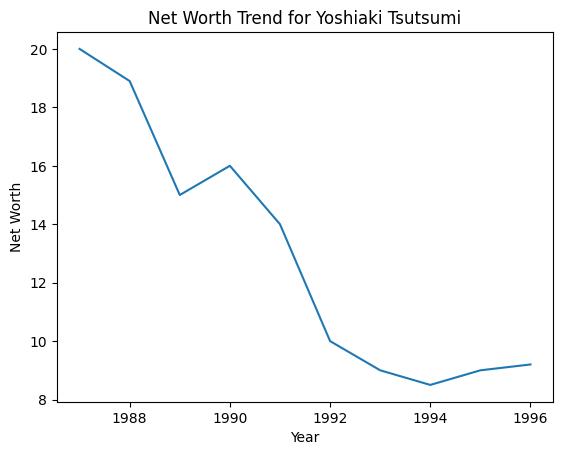

In [45]:
#distribution of net worth within industries using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Net worth', data=df)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Net Worth')
plt.title('Distribution of Net Worth within Industries')
plt.show()

#trends and rankings of specific individuals
individual_df = df[df['Name'] == 'Yoshiaki Tsutsumi']
plt.plot(individual_df['Year'], individual_df['Net worth'])
plt.xlabel('Year')
plt.ylabel('Net Worth')
plt.title('Net Worth Trend for Yoshiaki Tsutsumi')
plt.show()

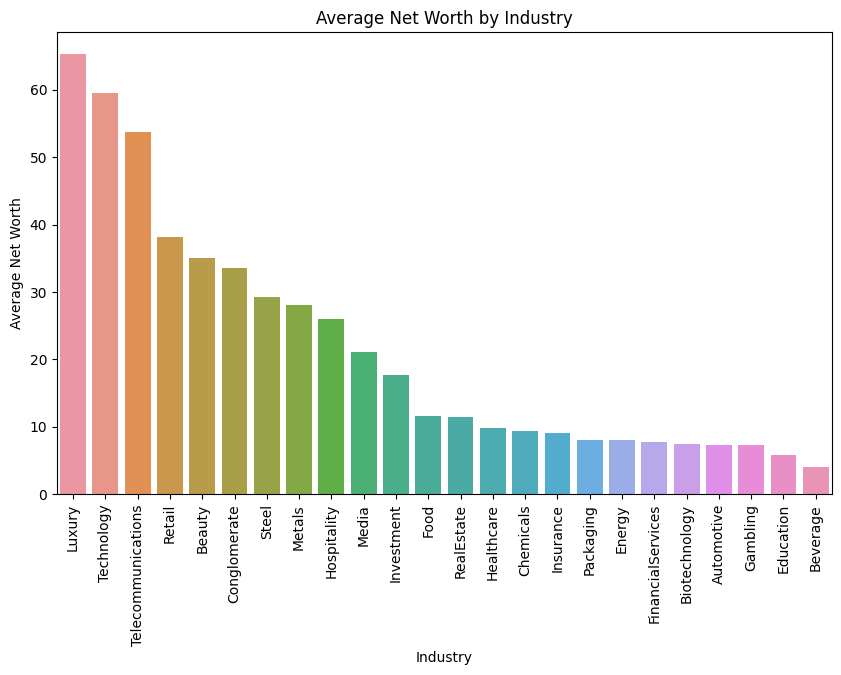

In [46]:
subset_cols = ['Year', 'Name', 'Net worth', 'Industry']
df_subset = df[subset_cols]
#Grouping the data by industry and calculate the average net worth for each industry
industry_avg_networth = df_subset.groupby('Industry')['Net worth'].mean().sort_values(ascending=False)

#Ploting the average net worth by industry
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_avg_networth.index, y=industry_avg_networth.values)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Average Net Worth')
plt.title('Average Net Worth by Industry')
plt.show()

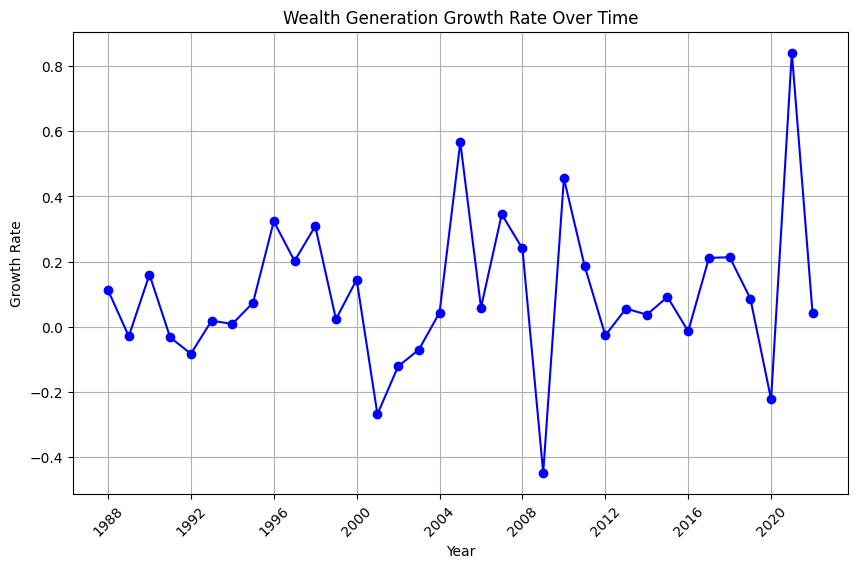

In [47]:
#Converting the Year column to datetime format for proper time series analysis
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
yearly_stats = df.groupby('Year')['Net worth'].agg(['sum', 'mean', 'count'])
yearly_stats['growth_rate'] = yearly_stats['sum'].pct_change()
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats.index, yearly_stats['growth_rate'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Wealth Generation Growth Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-48-7bc10e99cd63>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_country_performance = df.groupby(['Industry', 'Nationality']).mean()


<Figure size 1500x600 with 0 Axes>

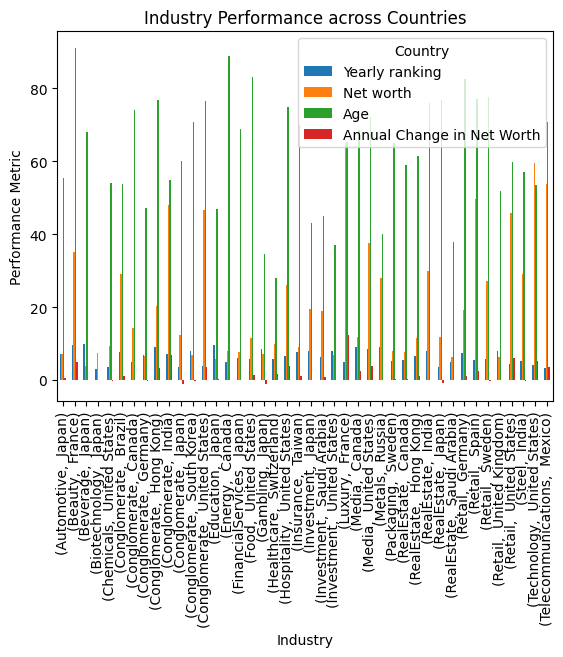

In [48]:
industry_country_performance = df.groupby(['Industry', 'Nationality']).mean()
#Visualize the comparison
plt.figure(figsize=(15, 6))
industry_country_performance.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Performance Metric')
plt.title('Industry Performance across Countries')
plt.legend(title='Country')
plt.show()

# **Time Series Analysis**


*   Trend: It represents the long-term movement or direction in the 'Net worth' values.
*   Seosonal: It represents the repeating patterns that occur at regular intervals


*   Residual: It represents the random fluctuations or noise in the time series.





<ipython-input-49-3a4d24206df7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data['Year'] = pd.to_datetime(ts_data['Year'], format='%Y')


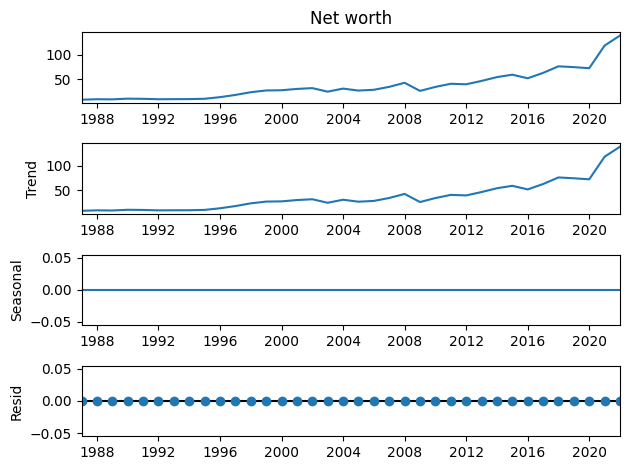

In [49]:
#Extract relevant columns for time series analysis
ts_data = df[['Year', 'Net worth', 'Age']]

#Converting Year column to datetime format
ts_data['Year'] = pd.to_datetime(ts_data['Year'], format='%Y')
#Grouping by 'Year' and aggregate the data
ts_data = ts_data.groupby('Year').mean()
#Create a new index with the desired frequency
new_index = pd.date_range(start=ts_data.index.min(), end=ts_data.index.max(), freq='AS')
#Reindex the DataFrame with the new index
ts_data = ts_data.reindex(new_index)
#Perform time series decomposition
decomposition = seasonal_decompose(ts_data['Net worth'], model='additive')
#Visualize the decomposed components (trend, seasonality, residual)
decomposition.plot()
plt.show()

We can't use regression methods for prediction as we don't have continuous previous data to study on and predict the next data.

**Random Forest Classifier**

In [72]:
df=pd.read_csv('industry.csv')
df.dropna()
X = df[['Yearly ranking', 'Net worth','Annual Change in Net Worth']]
y = df['Yearly ranking']  # Target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

model_rf_smote.fit(X_train,y_train)
model_score_r1 = model_rf_smote.score(X_test, y_test)
print(model_score_r1)

0.8307692307692308


**Naive Bayes**


In [71]:
X = df[['Year','Yearly ranking', 'Net worth', 'Annual Change in Net Worth']]  # Features
y = df['Yearly ranking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(X_train_scaled, y_train)
model_score_naive_bayes = model_naive_bayes.score(X_test_scaled, y_test)
print("Naive Bayes Model Accuracy:", model_score_naive_bayes)

Naive Bayes Model Accuracy: 1.0


**KNN**

In [70]:
X = df[['Year','Yearly ranking', 'Net worth', 'Annual Change in Net Worth']]  # Features
y = df['Yearly ranking']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features to have zero mean and unit variance (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_knn = KNeighborsClassifier(n_neighbors=3)  # You can set the number of neighbors (k) as per your requirement
model_knn.fit(X_train_scaled, y_train)
model_score_knn = model_knn.score(X_test_scaled, y_test)
print("KNN Model Accuracy:", model_score_knn)

KNN Model Accuracy: 0.5846153846153846


**Logistic Regression**

In [84]:
X = df[['Year', 'Net worth','Yearly ranking','Annual Change in Net Worth']]
y = df['Yearly ranking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_logreg = LogisticRegression()
model_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = model_logreg.predict(X_test_scaled)
model_score_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression:", model_score_logreg)

Logistic Regression: 0.6307692307692307


**Accuracy For Different Classifications**

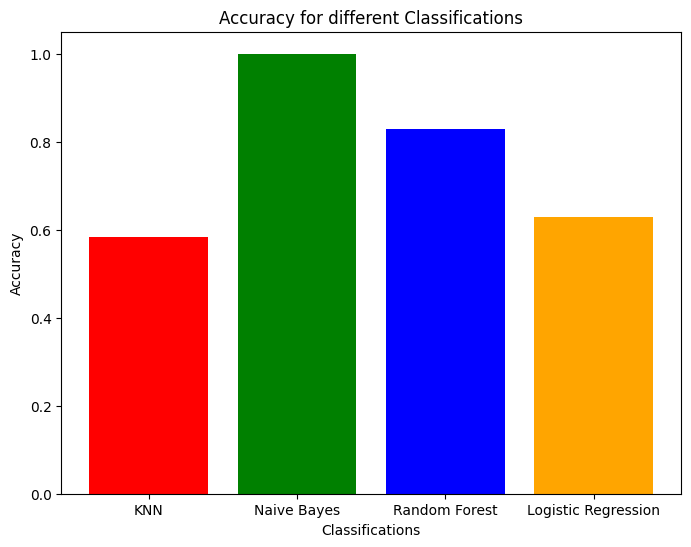

In [79]:
a=['KNN','Naive Bayes','Random Forest','Logistic Regression']
b=[0.584,1.0,0.83,0.63]
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue','orange']
plt.bar(a, b, color=colors)
plt.title('Accuracy for different Classifications')
plt.xlabel('Classifications')
plt.ylabel('Accuracy')
plt.show()